In [4]:
import cv2 as cv

In [5]:
detector = cv.ORB_create()

In [6]:
matcher = cv.BFMatcher(crossCheck=True)

In [7]:
from pymongo import MongoClient; cli = MongoClient('192.168.0.16', 27017); db = cli['nephos']; images = db['images']

In [85]:
from base64 import b64decode; import numpy as np

In [32]:
imDocs = images.find({}).limit(5).sort("date", -1)

In [33]:
imDocs.count(True)

5

In [29]:
def loadImage(cursor):
	result = cursor.next()

	if result.get("image64") is not None:
		img = b64decode(result['image64'])
		npimg = np.fromstring(img, dtype=np.uint8) 
		cvImage = cv.imdecode(npimg, 1)
		print(result['date'], result['type'], result['_id'])
		return cvImage
	else:
		return None

In [34]:
im1 = loadImage(imDocs)

1486644300.0 avn 58b3a14444a7e0289931cc20


In [35]:
im2 = loadImage(imDocs)

1486642500.0 avn 58b3a14444a7e0289931cc15


In [14]:
import matplotlib.pyplot as plt

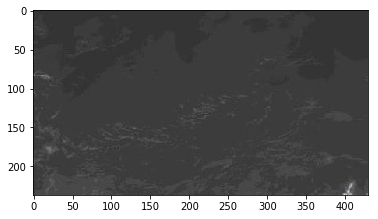

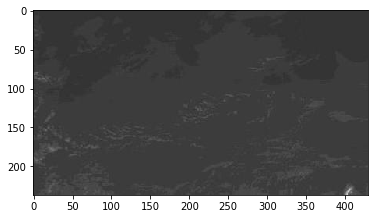

In [36]:
plt.imshow(im1); plt.show(); plt.imshow(im2); plt.show()

In [37]:
# Getting matches

In [38]:
(kp1, des1) = detector.detectAndCompute(im1, None)

In [39]:
(kp2, des2) = detector.detectAndCompute(im2, None)

In [41]:
matches = matcher.match(des1, des2)

In [54]:
gray1 = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)

In [55]:
im1Kp = cv.drawKeypoints(gray1, kp1, im1)

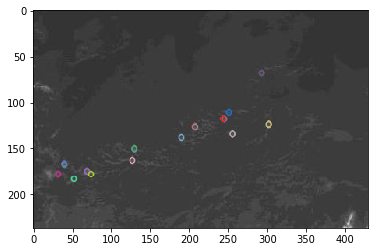

In [70]:
plt.imshow(im1Kp, aspect='auto'); plt.show()

In [57]:
gray2 = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

In [58]:
im2Kp = cv.drawKeypoints(gray2, kp2, im2)

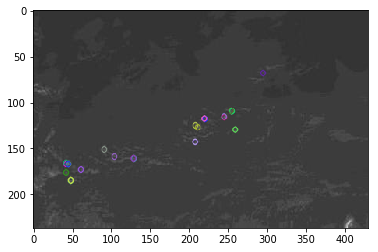

In [69]:
plt.imshow(im2Kp, aspect='auto'); plt.show()

In [65]:
matchesIm = cv.drawMatches(im1, kp1, im2, kp2, matches, None)

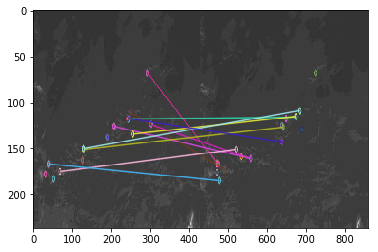

In [68]:
plt.imshow(matchesIm, aspect='auto'); plt.show()

In [67]:
plt.imshow?

In [73]:
match = matches[0]

In [80]:
[x.distance for x in matches]

[403.0905456542969,
 422.6144714355469,
 407.936279296875,
 412.3275451660156,
 445.2830505371094,
 409.62298583984375,
 356.8725280761719,
 404.4366455078125,
 355.90167236328125,
 465.599609375,
 434.80914306640625]

In [86]:
import pandas as pd

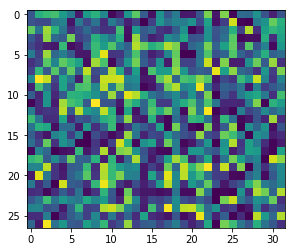

In [96]:
plt.imshow(des2); plt.show()

In [99]:
[(index, k.size) for index,k in enumerate(kp1)]

[(0, 31.0),
 (1, 31.0),
 (2, 31.0),
 (3, 31.0),
 (4, 31.0),
 (5, 31.0),
 (6, 31.0),
 (7, 31.0),
 (8, 31.0),
 (9, 31.0),
 (10, 31.0),
 (11, 31.0),
 (12, 31.0),
 (13, 37.20000076293945),
 (14, 37.20000076293945),
 (15, 37.20000076293945),
 (16, 37.20000076293945),
 (17, 37.20000076293945),
 (18, 37.20000076293945),
 (19, 44.6400032043457),
 (20, 44.6400032043457),
 (21, 44.6400032043457),
 (22, 53.5680046081543),
 (23, 53.5680046081543)]

In [120]:
[(k.pt, k.angle, k.size) for index,k in enumerate(kp2[:5])]

[((295.0, 68.0), 157.6733856201172, 31.0),
 ((245.0, 116.0), 290.1512756347656, 31.0),
 ((208.0, 125.0), 48.23641586303711, 31.0),
 ((211.0, 127.0), 34.827049255371094, 31.0),
 ((208.0, 143.0), 253.70065307617188, 31.0)]

In [109]:
[(m.queryIdx, m.trainIdx) for m in matches]

[(0, 9),
 (1, 10),
 (2, 1),
 (3, 7),
 (4, 18),
 (6, 3),
 (9, 5),
 (16, 14),
 (17, 25),
 (18, 12),
 (22, 17)]

In [128]:
im1.shape[:2]

(237, 430)

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


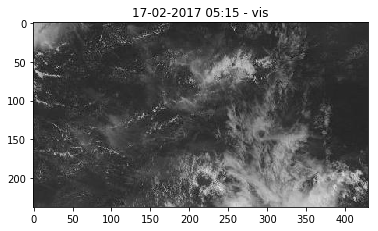

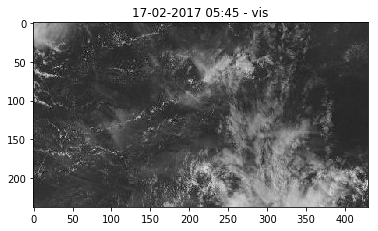

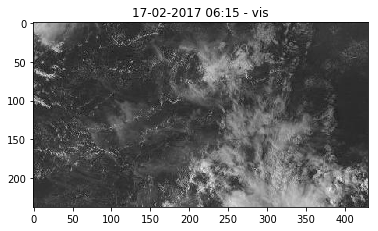

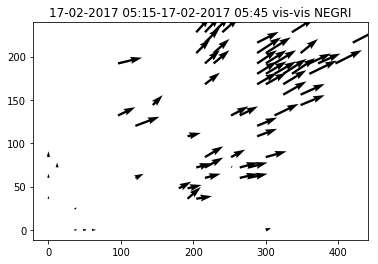

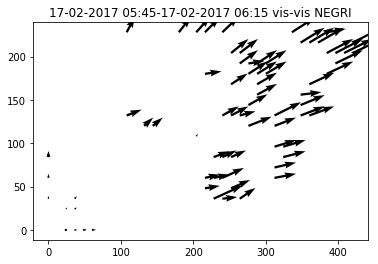

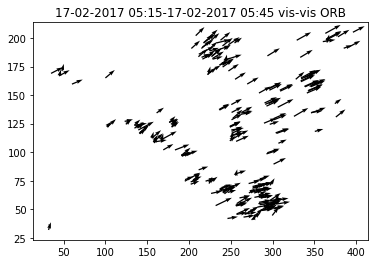

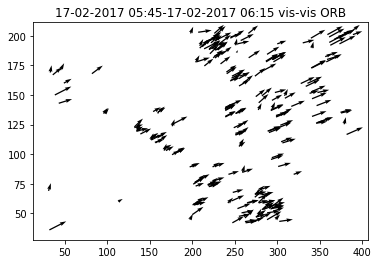

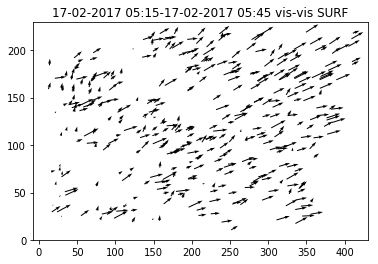

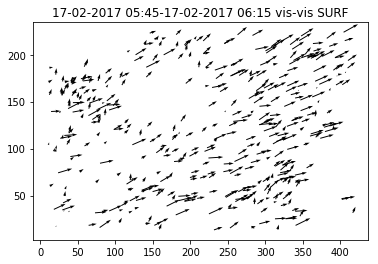

In [1]:
run ../src/makeWindsMap.py